In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from persim import PersImage

In [3]:
pim_df = pd.read_csv("./pim_vectors.csv")
pim_df.head()

,px0,px1,px2,px3,px4,px5,px6,px7,px8,px9,...,px392,px393,px394,px395,px396,px397,px398,px399,gest,subj
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002271,0.000007,1.973388e-02,8.235150e-02,0.054174,0.000297,9.576168e-04,1.096862e-03,5.0,30.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,3.0,30.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093948,0.000150,3.287840e-11,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,4.0,30.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.430686,0.253208,8.314040e-02,1.197688e-01,0.035306,0.000668,4.911566e-08,1.071083e-10,2.0,30.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013055,0.027899,9.637778e-05,2.980224e-11,0.000000,0.000000,0.000000e+00,0.000000e+00,4.0,30.0


In [10]:
g5=pim_df.iloc[0,:-2].values.reshape(20, 20)
g3=pim_df.iloc[1,:-2].values.reshape(20, 20)
g4=pim_df.iloc[2,:-2].values.reshape(20, 20)
g2=pim_df.iloc[3,:-2].values.reshape(20, 20)
g2n=pim_df.iloc[3,:-2].values.reshape(20, 20)

In [11]:
pim = PersImage(spread=1e-5, pixels=[20,20], verbose=False)

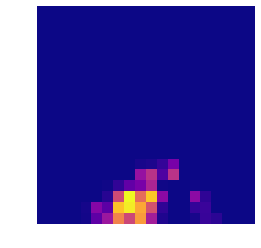

In [12]:
pim.show(g5)

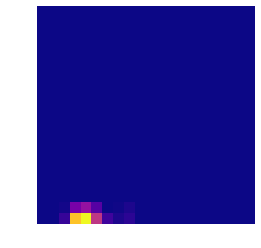

In [13]:
pim.show(g3)

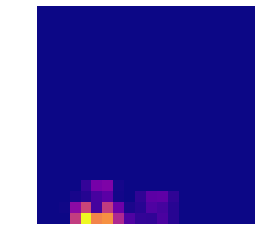

In [14]:
pim.show(g4)

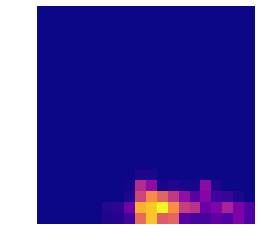

In [11]:
pim.show(g2)